### EDA 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_json('contacts.json').set_index('Id')
data

,Email,Phone,Contacts,OrderId
Id,,,,
0,gkzAbIy@qq.com,,1,
1,,329442681752,4,vDDJJcxfLtSfkooPhbYnJdxov
2,,9125983679,0,
3,mdllpYmE@gmail.com,,0,bHquEnCbbsGLqllwryxPsNOxa
4,,300364407,2,
...,...,...,...,...
499995,,10072395382,2,whJlUOGNqjxCRzmIRdURQvlNv
499996,,571709661031,4,JqIXOONvrwvJxZqNxCYHqnrKS
499997,,4541459979,2,beXCZSzcHaBwAYoDcpQqjuAFO


In [5]:
data.dtypes

Email       object
Phone       object
Contacts     int64
OrderId     object
dtype: object

In [7]:
data.replace({'':np.NaN}, inplace=True)

In [8]:
np.where(pd.isnull(data))

(array([     0,      0,      1, ..., 499996, 499997, 499999], dtype=int64),
 array([1, 3, 0, ..., 0, 0, 0], dtype=int64))

In [9]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
OrderId,256456,0.512912
Phone,254919,0.509838
Email,151394,0.302788
Contacts,0,0.000000


C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Contacts', ylabel='Density'>

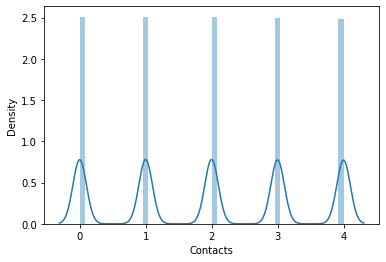

In [10]:
sns.distplot(data['Contacts'])

In [11]:
data['Contacts'].value_counts()

2    100409
1    100354
0    100080
3     99753
4     99404
Name: Contacts, dtype: int64

In [12]:
data.groupby(['Contacts'])['OrderId']

In [13]:
data.melt(id_vars=['Email'], value_vars=['Contacts', 'OrderId'])

,Email,variable,value
0,gkzAbIy@qq.com,Contacts,1
1,NaN,Contacts,4
2,NaN,Contacts,0
3,mdllpYmE@gmail.com,Contacts,0
4,NaN,Contacts,2
...,...,...,...
999995,NaN,OrderId,whJlUOGNqjxCRzmIRdURQvlNv
999996,NaN,OrderId,JqIXOONvrwvJxZqNxCYHqnrKS
999997,NaN,OrderId,beXCZSzcHaBwAYoDcpQqjuAFO
999998,RzSDsyH@hotmail.com,OrderId,ehjeFACGiwrERQxbziMxwOWku


In [14]:
data.stack().head(30)

Id          
0   Email                  gkzAbIy@qq.com
    Contacts                            1
1   Phone                    329442681752
    Contacts                            4
    OrderId     vDDJJcxfLtSfkooPhbYnJdxov
2   Phone                      9125983679
    Contacts                            0
3   Email              mdllpYmE@gmail.com
    Contacts                            0
    OrderId     bHquEnCbbsGLqllwryxPsNOxa
4   Phone                       300364407
    Contacts                            2
5   Phone                       840113148
    Contacts                            0
6   Email        hESiBgYTxMnj@hotmail.com
    Contacts                            4
7   Email        hqyunTiaXfIjhO@yahoo.com
    Contacts                            1
    OrderId     vxjYZtMUvNhtEBDruzQfjpsmX
8   Email         XGUjcSiDpFKWEUCs@qq.com
    Phone                    223604620644
    Contacts                            2
9   Email          osIIQgAiZX@hotmail.com
    Contacts         

In [ ]:
hESiBgYTxMnj

In [51]:
data['Email'].str.contains('hESiBgYTxMnj')

Id
0         False
1         False
2         False
3         False
4         False
          ...  
499995    False
499996    False
499997    False
499998    False
499999    False
Name: Email, Length: 500000, dtype: bool

In [15]:
haa = np.where(data['Email'] == 'hqyunTiaXfIjhO@yahoo.com')
haa

(array([7], dtype=int64),)

In [16]:
data[data['OrderId'] == 'AADcJzTiOYaerdvPPIpHTYWFg'].index

Int64Index([445646], dtype='int64', name='Id')

In [18]:
data[data['OrderId'] == 'AADcJzTiOYaerdvPPIpHTYWFg'].value_counts()

Series([], dtype: int64)

In [129]:
data = data.replace('NA', np.NaN, inplace=True)

In [19]:
multi_data = data.set_index(['Email', 'OrderId'])
multi_data

Phone  Contacts
Email               OrderId                                          
gkzAbIy@qq.com      NaN                                 NaN         1
NaN                 vDDJJcxfLtSfkooPhbYnJdxov  329442681752         4
                    NaN                          9125983679         0
mdllpYmE@gmail.com  bHquEnCbbsGLqllwryxPsNOxa           NaN         0
NaN                 NaN                           300364407         2
...                                                     ...       ...
                    whJlUOGNqjxCRzmIRdURQvlNv   10072395382         2
                    JqIXOONvrwvJxZqNxCYHqnrKS  571709661031         4
                    beXCZSzcHaBwAYoDcpQqjuAFO    4541459979         2
RzSDsyH@hotmail.com ehjeFACGiwrERQxbziMxwOWku   98947185431         1
NaN                 JibSBRgzYdfzkzbTuGUXrcvDX  880053388839         0

[500000 rows x 2 columns]

In [20]:
multi_data.loc[(slice(None), 'bHquEnCbbsGLqllwryxPsNOxa'), :]

,,Phone,Contacts
Email,OrderId,,
mdllpYmE@gmail.com,bHquEnCbbsGLqllwryxPsNOxa,NaN,0


In [100]:
data = data.reset_index()

In [105]:
data = data.set_index('Id')

In [21]:
data.groupby('Email').sum()

,Contacts
Email,
AAAQbNfGbLAeOvw@hotmail.com,4
AAAgyKTteOjasN@qq.com,2
AABZmKeEldvO@gmail.com,2
AABneiGcqcz@qq.com,3
AABtOIZmdYdKGnidAK@yahoo.com,1
...,...
zzyYjbPWM@hotmail.com,6
zzyacSRLb@gmail.com,4
zzylmjkoqfCkTOxi@hotmail.com,3


In [109]:
data.groupby('OrderId').get_group('329442681752')['Contacts']

KeyError: '329442681752'

In [ ]:
email_dict = 


In [22]:
data_test = data.apply(lambda x: list(set(x)), axis = 1)

In [23]:
data_test

Id
0                                  [nan, 1, gkzAbIy@qq.com]
1         [nan, 329442681752, 4, vDDJJcxfLtSfkooPhbYnJdxov]
2                                      [nan, 0, 9125983679]
3         [mdllpYmE@gmail.com, nan, bHquEnCbbsGLqllwryxP...
4                                       [nan, 2, 300364407]
                                ...                        
499995     [nan, 2, whJlUOGNqjxCRzmIRdURQvlNv, 10072395382]
499996    [nan, 571709661031, 4, JqIXOONvrwvJxZqNxCYHqnrKS]
499997      [nan, beXCZSzcHaBwAYoDcpQqjuAFO, 4541459979, 2]
499998    [1, 98947185431, RzSDsyH@hotmail.com, ehjeFACG...
499999    [nan, 0, 880053388839, JibSBRgzYdfzkzbTuGUXrcvDX]
Length: 500000, dtype: object

In [114]:
print(f"Distinct entries: {len(data.groupby(['OrderId', 'Email']))}")

Distinct entries: 389155


In [24]:
duplicateRowsDF = data[data['OrderId'].duplicated()]
duplicateRowsDF

,Email,Phone,Contacts,OrderId
Id,,,,
2,NaN,9125983679,0,NaN
4,NaN,300364407,2,NaN
5,NaN,840113148,0,NaN
6,hESiBgYTxMnj@hotmail.com,NaN,4,NaN
8,XGUjcSiDpFKWEUCs@qq.com,223604620644,2,NaN
...,...,...,...,...
499990,NaN,880752090156,2,ElrIJOTvTabhzXnSMXOLtUibu
499991,ygooASjKOiBvQ@gmail.com,NaN,0,NaN
499992,NaN,091671682818,2,NaN


In [25]:
duplicate_in_email = data.duplicated(subset=['Email']).any()

In [26]:
if duplicate_in_email.any():
    print(data.loc[~duplicate_in_email], end='\n\n')

KeyError: False

In [28]:
d = {}
for col in data:
    d[col] = data[col].unique()

In [37]:
email_dict = {}
for i in data['Email'].unique():
    email_dict[i] = []
len(email_dict)

249157

In [33]:
d

{'Email': array(['gkzAbIy@qq.com', nan, 'mdllpYmE@gmail.com', ...,
        'qXUQsYAv@yahoo.com', 'btjvtrrKGFKcqgop@qq.com',
        'RzSDsyH@hotmail.com'], dtype=object),
 'Phone': array([nan, '329442681752', '9125983679', ..., '4541459979',
        '98947185431', '880053388839'], dtype=object),
 'Contacts': array([1, 4, 0, 2, 3], dtype=int64),
 'OrderId': array([nan, 'vDDJJcxfLtSfkooPhbYnJdxov', 'bHquEnCbbsGLqllwryxPsNOxa', ...,
        'JqIXOONvrwvJxZqNxCYHqnrKS', 'beXCZSzcHaBwAYoDcpQqjuAFO',
        'JibSBRgzYdfzkzbTuGUXrcvDX'], dtype=object)}

In [38]:
data.drop_duplicates(['Email', 'OrderId'], keep='last')

,Email,Phone,Contacts,OrderId
Id,,,,
0,gkzAbIy@qq.com,NaN,1,NaN
1,NaN,329442681752,4,vDDJJcxfLtSfkooPhbYnJdxov
3,mdllpYmE@gmail.com,NaN,0,bHquEnCbbsGLqllwryxPsNOxa
7,hqyunTiaXfIjhO@yahoo.com,NaN,1,vxjYZtMUvNhtEBDruzQfjpsmX
8,XGUjcSiDpFKWEUCs@qq.com,223604620644,2,NaN
...,...,...,...,...
499995,NaN,10072395382,2,whJlUOGNqjxCRzmIRdURQvlNv
499996,NaN,571709661031,4,JqIXOONvrwvJxZqNxCYHqnrKS
499997,NaN,4541459979,2,beXCZSzcHaBwAYoDcpQqjuAFO


In [40]:
data.loc[(data['Email'] == 'XGUjcSiDpFKWEUCs@qq.com')]

,Email,Phone,Contacts,OrderId
Id,,,,
8,XGUjcSiDpFKWEUCs@qq.com,223604620644,2,NaN


In [46]:
# data.Email.unique
email_list = []
for i in data.Email.unique():
    if i not in email_list:
        email_list.append(i)
email_list

KeyboardInterrupt: 

In [75]:
email_list

['gkzAbIy@qq.com',
 nan,
 'mdllpYmE@gmail.com',
 'hESiBgYTxMnj@hotmail.com',
 'hqyunTiaXfIjhO@yahoo.com',
 'XGUjcSiDpFKWEUCs@qq.com',
 'osIIQgAiZX@hotmail.com',
 'QRamvop@qq.com',
 'QexYMLXc@qq.com',
 'YsKhkKGJoQSNniHcr@yahoo.com',
 'TNaMorNIWCJARsXlg@gmail.com',
 'qOkuzhOuPsbltatw@qq.com',
 'OPDjDybln@qq.com',
 'pakhLVMLp@qq.com',
 'BWoPWiRuMzWyInsDy@gmail.com',
 'FoaGWGbpnlvizkIG@qq.com',
 'jsHBHNssMav@hotmail.com',
 'mJDLhbFcHYsq@qq.com',
 'HnpNQFirm@yahoo.com',
 'MbjTCmxpcqf@yahoo.com',
 'QeUmxugpDKAKeRLNjX@yahoo.com',
 'mgKGRKoFOdsB@yahoo.com',
 'LrDMxWTpx@qq.com',
 'XLAVlZUqxWprVG@gmail.com',
 'YPuAqGfmVcEgE@gmail.com',
 'PsVlemLYj@qq.com',
 'mnCqgyZpXZGUrEVkc@yahoo.com',
 'rKNcHWwUKYb@qq.com',
 'VbaKKxkCzo@yahoo.com',
 'rkxfmOdDeriajmcZGT@qq.com',
 'FivCkMqgnZ@gmail.com',
 'DEkFDIFBKSi@gmail.com',
 'VfuhRFLQevQ@yahoo.com',
 'GNMmyGiWbSsDTdMayomQ@qq.com',
 'TIMejlVYhfqjy@gmail.com',
 'LEQvQVjRnZGUzzii@qq.com',
 'ITSENNNBYRhq@yahoo.com',
 'jHkRilpCWry@hotmail.com',
 'wwffNSus@hotm

In [45]:
len(email_list)

249157

In [50]:
uniqueValues = data['Email'].nunique(dropna=False)
uniqueValues

249157

In [51]:
data['Email'].value_counts()

joeiBlUUXIEsEBHp@yahoo.com        8
cNOClXNUqeYiWUPu@hotmail.com      7
CTZmhZeinbwjkCDNZl@hotmail.com    7
EacGcUDVEcfjDh@hotmail.com        7
ufoNSxBXftmIUg@yahoo.com          6
                                 ..
IioRGWQvfwzImJqXS@hotmail.com     1
moKiArLICKJSE@yahoo.com           1
dhrXGbl@yahoo.com                 1
bxjjnPJfHLHFMSBdx@hotmail.com     1
UHjaYRxmVIUAHQH@yahoo.com         1
Name: Email, Length: 249156, dtype: int64

In [53]:
data['Email'].values

array(['gkzAbIy@qq.com', nan, nan, ..., nan, 'RzSDsyH@hotmail.com', nan],
      dtype=object)

In [57]:
data.columns

Index(['Email', 'Phone', 'Contacts', 'OrderId'], dtype='object')

In [65]:
data['Email'].unique()

array(['gkzAbIy@qq.com', nan, 'mdllpYmE@gmail.com', ...,
       'qXUQsYAv@yahoo.com', 'btjvtrrKGFKcqgop@qq.com',
       'RzSDsyH@hotmail.com'], dtype=object)

In [67]:
data.values

array([['gkzAbIy@qq.com', nan, 1, nan],
       [nan, '329442681752', 4, 'vDDJJcxfLtSfkooPhbYnJdxov'],
       [nan, '9125983679', 0, nan],
       ...,
       [nan, '4541459979', 2, 'beXCZSzcHaBwAYoDcpQqjuAFO'],
       ['RzSDsyH@hotmail.com', '98947185431', 1,
        'ehjeFACGiwrERQxbziMxwOWku'],
       [nan, '880053388839', 0, 'JibSBRgzYdfzkzbTuGUXrcvDX']],
      dtype=object)

In [72]:
len(data['Email'].values)

500000

In [73]:
len(data['Email'].unique())

249157

In [69]:
kolom = data.columns
watwat = []
for i in data[kolom]:
    if data[kolom].values == data
    a = np.where(data[kolom].values == data[kolom].unique())
#     watwat.append(a)
#     a

AttributeError: 'DataFrame' object has no attribute 'unique'

In [74]:
def list_duplicates_of(seq,item):
    start_at = -1
    locs = []
    while True:
        try:
            loc = seq.index(item,start_at+1)
        except ValueError:
            break
        else:
            locs.append(loc)
            start_at = loc
    return locs

# source = "ABABDBAAEDSBQEWBAFLSAFB"
print(list_duplicates_of(data['Email'], 'gkzAbIy@qq.com'))

TypeError: 'Int64Index' object is not callable

In [76]:
final_list = list(filter(lambda x: x['Email'] == 'gkzAbIy@qq.com', email_list))

TypeError: string indices must be integers

In [79]:
biasalah = pd.concat(g for _, g in data.groupby("OrderId") if len(g) > 1)

In [80]:
biasalah

,Email,Phone,Contacts,OrderId
Id,,,,
13086,FYHExGcXBWwoQsGW@hotmail.com,NaN,3,AAHeDQwhQuenpHpFDtYbzhRtG
35886,NaN,66034484032,2,AAHeDQwhQuenpHpFDtYbzhRtG
217525,DYozFPFObXSDKDEoJ@gmail.com,NaN,4,AAJYFqwdgWsaQjitbggfaqoNN
222796,vnyGCsQqO@qq.com,211643186759,4,AAJYFqwdgWsaQjitbggfaqoNN
488624,McmsuPqCkK@yahoo.com,NaN,1,AAJYFqwdgWsaQjitbggfaqoNN
...,...,...,...,...
313126,pgaXZyfo@yahoo.com,NaN,0,zzrXZnyfHYarZelcRefAAoyvh
248350,nfkfvNIlpNZcIyP@yahoo.com,0379800546,1,zzsFsluGkqmOrkrdNGBqWxZsN
341269,NaN,898385536885,0,zzsFsluGkqmOrkrdNGBqWxZsN


In [82]:
dup_ord = data[data.duplicated(keep=False)]

dup_ord = dup_ord.groupby(list(dup_ord)).apply(lambda x: tuple(x.index)).tolist()
print (dup_ord)

AttributeError: 'DataFrame' object has no attribute 'tolist'

In [83]:
uniqueValues = data.nunique(dropna=False)
print("Count Unique values in each column including NaN")
print(uniqueValues)


Count Unique values in each column including NaN
Email       249157
Phone       190678
Contacts         5
OrderId     189303
dtype: int64


In [84]:
df = pd.read_json('contacts.json')
df.replace({'':np.NaN}, inplace=True)

In [85]:
ord = df.drop(columns=['Id','Email','Phone','Contacts'])
ord = ord[ord.duplicated(keep=False)]

ord = ord.groupby(list(ord)).apply(lambda x: list(x.index)).tolist()
print (ord)

[[13086, 35886], [217525, 222796, 488624], [212727, 361700, 454292], [51827, 255333], [338630, 401880, 436322], [78382, 330665], [68035, 106903], [233420, 465861], [17821, 293092, 303259], [106403, 106829], [224554, 423456], [76, 470100], [47705, 205921], [94205, 317252], [358373, 472734], [269724, 314485], [1941, 476213], [52151, 284837], [100084, 281325], [7066, 354311], [146954, 367386], [72578, 139028, 404108], [147218, 418455], [188198, 452944], [17801, 58057, 284402], [99, 62730, 115978, 127705], [144216, 287450, 399793], [56040, 220464], [175959, 449861], [24974, 417348], [13669, 41446], [194256, 479266], [27083, 180860], [180246, 287390], [93507, 228560, 266942], [337496, 369103], [3833, 292948], [313560, 374404], [72970, 149565, 435254], [383655, 405156], [207307, 214996, 353605], [149108, 234103], [196308, 224381], [12138, 163664], [4249, 298322], [35424, 97099], [101546, 332855], [53530, 257847], [71859, 416372], [26808, 313055], [402862, 482602], [139511, 239260, 492470], [

In [86]:
phn = df.drop(columns=['Id','Email','OrderId','Contacts'])
phn = phn[phn.duplicated(keep=False)]

phn = phn.groupby(list(phn)).apply(lambda x: list(x.index)).tolist()
print (phn)

[[229812, 265783], [95070, 428624], [142031, 395090], [107760, 296641], [139526, 288114], [134398, 213348], [11718, 318151], [127230, 269533, 471448], [41853, 110011, 325971], [12744, 38473, 57950], [59622, 101391], [192528, 359941], [65011, 270974], [165026, 275582], [213347, 302106], [208086, 404674], [130559, 330154], [234284, 315231], [374908, 457560], [244275, 393737, 484477], [203009, 204219], [239056, 430956, 477256], [242221, 391965], [214134, 234498], [193335, 378329], [198173, 425016], [194607, 304438], [193887, 304302, 332578], [353978, 364943], [259083, 290543], [251727, 330634], [32882, 140610], [62162, 350161], [6802, 404968], [2600, 133309], [118251, 188134], [152125, 382066], [87900, 360060], [6885, 46182, 93486], [131410, 229667, 324973], [6998, 351424], [25776, 145594], [302089, 433728], [86663, 342406], [172445, 195277], [234158, 291122, 455155], [75301, 465184], [62214, 253960], [71764, 187095], [72431, 351315], [93299, 484310], [345210, 397764], [38802, 147939, 197

In [87]:
eml = df.drop(columns=['Id','Phone','OrderId','Contacts'])
eml = eml[eml.duplicated(keep=False)]

eml = eml.groupby(list(eml)).apply(lambda x: list(x.index)).tolist()
print (eml)

[[112387, 470075], [19504, 179125], [20825, 337532], [221848, 330517], [254424, 367012, 390060], [16270, 248744], [210179, 339947], [127885, 132963, 466711], [222215, 244884], [56839, 258732], [228597, 388901], [202927, 291626], [319668, 446875], [84750, 246671, 313428], [74644, 475769], [332543, 493637], [24672, 106909, 235761], [220415, 268502], [7152, 42806, 435852], [93781, 146165], [124235, 146358, 441742], [16925, 171749, 253040], [462, 447282], [34693, 188920, 480486], [99875, 367698], [334420, 433170], [172383, 199565, 484769], [247360, 250269, 392060], [192793, 391357, 451913], [80044, 151784, 226737], [338735, 496564], [6030, 101330, 117726], [378561, 397432], [171625, 338598], [44071, 59420], [9595, 420833], [376235, 408738], [303896, 417013], [157569, 346078], [115902, 363296, 490832], [355559, 392931], [78606, 470364], [54619, 283460], [372292, 382406], [153455, 316376], [120756, 315803], [133, 445333], [132596, 456734], [18755, 106342, 219206, 458025], [113311, 186067], [

In [90]:
# foo = pd.merge(ord, phn)
lmao = ord.extend(phn)

In [97]:
lmao = []
map(lmao.extend, ord)

In [101]:
def convert_list(l):
    return dict((sublist[0], set(sublist[1:])) for sublist in l)

def merge_lists(l1, l2):
    result = []
    d1 = convert_list(l1)
    d2 = convert_list(l2)
    for index, l2_nums in d2.items():
        if index not in d1:
            #no matching index
            continue
        l1_nums = d1[index]
        sub_nums = [l2_num for l2_num in l2_nums if l2_num - 1 in l1_nums]
        if sub_nums:
            result.append([index] + sorted(list(sub_nums)))
    return result

In [102]:
merge_lists(ord, phn)

[]

In [107]:
def intersection(ls1, ls2):
    ls3 = [value for value in ls1 if value in ls2]
    return ls3

In [111]:
sora = intersection(ord, phn)

In [113]:
sora

[[229812, 265783],
 [95070, 428624],
 [142031, 395090],
 [107760, 296641],
 [139526, 288114],
 [134398, 213348],
 [11718, 318151],
 [127230, 269533, 471448],
 [41853, 110011, 325971],
 [12744, 38473, 57950],
 [59622, 101391],
 [192528, 359941],
 [65011, 270974],
 [165026, 275582],
 [213347, 302106],
 [208086, 404674],
 [130559, 330154],
 [234284, 315231],
 [374908, 457560],
 [244275, 393737, 484477],
 [203009, 204219],
 [239056, 430956, 477256],
 [242221, 391965],
 [214134, 234498],
 [193335, 378329],
 [198173, 425016],
 [194607, 304438],
 [193887, 304302, 332578],
 [353978, 364943],
 [259083, 290543],
 [251727, 330634],
 [32882, 140610],
 [62162, 350161],
 [6802, 404968],
 [2600, 133309],
 [118251, 188134],
 [152125, 382066],
 [87900, 360060],
 [6885, 46182, 93486],
 [131410, 229667, 324973],
 [6998, 351424],
 [25776, 145594],
 [302089, 433728],
 [86663, 342406],
 [172445, 195277],
 [234158, 291122, 455155],
 [75301, 465184],
 [62214, 253960],
 [71764, 187095],
 [72431, 351315],
 [932

In [118]:
for i in sora:
    print(sora)
#     tokino = "-".join(sora)
# tokino

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



KeyboardInterrupt: 

In [110]:
def intersect(a, b):
    return list(set(a) & set(b))

print(intersect(ord, phn))

TypeError: unhashable type: 'list'

# Referensi 

- https://www.reddit.com/r/learnpython/comments/7qpel8/merging_list_of_lists_based_on_common_elements/
- https://www.reddit.com/r/learnpython/comments/5yxgd4/flatten_a_nested_list_using_recursion_simplify/
- https://www.geeksforgeeks.org/python-merging-nested-lists/
- https://www.geeksforgeeks.org/python-intersection-of-two-nested-list/